**Q2. Practice with PCA**

In [2]:
import pandas as pd

df = pd.read_csv('/content/roles_life_cycle_mapping_wide.csv')

# Quick look at the dataset
print(df.head())


                          Job_Title  Flag  L1_Business opportunity  \
0               AI / ML Specialist      1                        2   
1           AI Adoption Specialist      1                        3   
2             AI Innovation Leader      1                        4   
3      AI Risk & Ethics Specialist      1                        3   
4  AI Test & Evaluation Specialist      1                        1   

   L2_Find data sources  L3_Explore and visualize data  \
0                     3                              4   
1                     1                              1   
2                     1                              1   
3                     2                              2   
4                     1                              2   

   L4_Develop data (Clean Data)  L5_Develop data (Feature-engineer)  \
0                             3                                   3   
1                             1                                   1   
2                

**1. Cleaning**

In [3]:
# Drop non-numeric column
df_clean = df.drop(columns=['Job_Title'])

# Confirm no missing values
print(df_clean.isnull().sum())

Flag                                         0
L1_Business opportunity                      0
L2_Find data sources                         0
L3_Explore and visualize data                0
L4_Develop data (Clean Data)                 0
L5_Develop data (Feature-engineer)           0
L6_Develop data (Collect additional data)    0
L7_Train models                              0
L8_Deploy best model                         0
L9_Monitor and manage model usage            0
L10_Measure success                          0
L11_Retrain or retire model                  0
dtype: int64


**2. Standardization**

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

**3. Performing PCA**

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each component:", explained_variance)

Explained Variance by each component: [0.45463528 0.23029243 0.09157839 0.08102353 0.05023801 0.03016311
 0.01659329 0.01330909 0.011913   0.00868615 0.00694624 0.00462149]


**4. Screen Plot and Percentage of Variance**

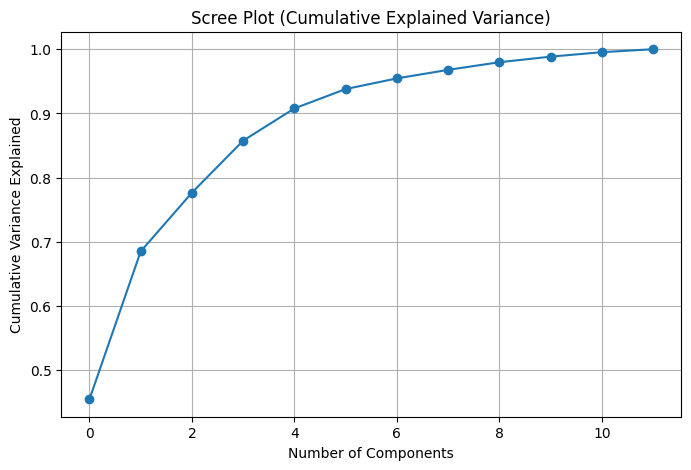

Variance retained by first 2 components: 68.49%


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Scree Plot (Cumulative Explained Variance)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

# Print variance retained by first n components (example: 2)
retained = np.sum(explained_variance[:2])
print(f"Variance retained by first 2 components: {retained:.2%}")

**5. Output the transformed dataset**

In [7]:
# Create DataFrame with top 2 components + Flag column
df_transformed = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
df_transformed['Flag'] = df_clean['Flag'].values

# Save if needed
df_transformed.to_csv("pca_transformed.csv", index=False)

print(df_transformed.head())

        PC1       PC2  Flag
0  2.308365 -0.931713     1
1 -2.034947 -2.803698     1
2 -2.552441 -2.012644     1
3 -1.638918 -0.438149     1
4 -0.221407 -2.673904     1


**6. Scatter Plot**

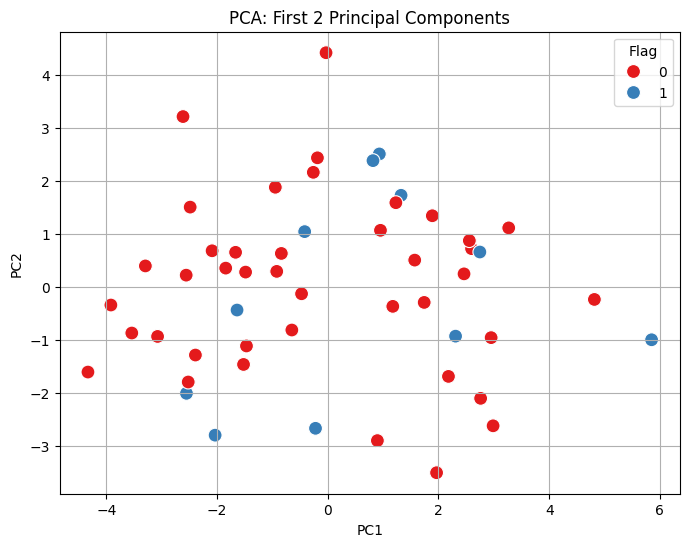

In [8]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_transformed, x='PC1', y='PC2', hue='Flag', palette='Set1', s=100)
plt.title('PCA: First 2 Principal Components')
plt.grid(True)
plt.show()


**Q3. Feature selection**

In [10]:
import pandas as pd

df = pd.read_csv("/content/BMI.csv")
# Check the actual column names in the DataFrame
print(df.columns)

Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'fatpctg'],
      dtype='object')


In [11]:
# Drop 'age', keep all others except target
X = df.drop(columns=['fatpctg', 'Age'])
y = df['fatpctg']

**1. Wrapper - Recursive Feature Elimination**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

top_features_wrapper = X.columns[rfe.support_]
print("Wrapper (RFE) - Top 5 features:", top_features_wrapper.tolist())

Wrapper (RFE) - Top 5 features: ['Neck', 'Abdomen', 'Hip', 'Forearm', 'Wrist']


**2. Embedded Method - Lasso Regression**

In [13]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X, y)

top_features_embedded = X.columns[lasso.coef_ != 0]
print("Embedded (Lasso) - Selected features:", top_features_embedded.tolist())

Embedded (Lasso) - Selected features: ['Weight', 'Height', 'Neck', 'Abdomen', 'Thigh']


**3. Filter Method - Mutual Information**

In [14]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X, y)
mi_series = pd.Series(mi_scores, index=X.columns)
mi_sorted = mi_series.sort_values(ascending=False)

top_features_filter = mi_sorted.head(5).index
print("Filter (Mutual Info) - Top 5 features:", top_features_filter.tolist())

Filter (Mutual Info) - Top 5 features: ['Abdomen', 'Chest', 'Hip', 'Thigh', 'Weight']
